In [2]:
from birdy import WPSClient
import birdy 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)

# finch_server = 'http://localhost:8092/wps'   # finch 
# finch_i = WPSClient(url=finch_server, progress=True)
# finch = WPSClient(finch_server)

In [3]:
from os import path, listdir
from os.path import basename
path = '/home/nils/nap_niger/data/evaluation/'
indic_path = '/home/nils/nap_niger/data/evaluation/indices/'


tas_files = [ indic_path+f for f in listdir(indic_path) if 'tg-mean' in f]
for i in(tas_files):
    print(basename(i))

tg-mean_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_19790101-20161231.nc
tg-mean_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_GERICS-REMO2015_v1_yr_19790102-20171231.nc


In [3]:
# lists all files stored in 'path'
tas_files = [ path+f for f in listdir(path) if 'tas_' in f]
pr_files = [ path+f for f in listdir(path) if 'pr_' in f]

# show the first files 

In [3]:
# Quick check of pr data in a plot:
out = fp_i.plot_spaghetti(pr_files)

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= out.get()[0])

In [5]:
# loop over the temperatur files and calculate the indices 
# outputs will stored in a seperate location

# freq='YS'
# freq='MS'

from os.path import basename 
import urllib.request

In [5]:
tg_yr = []

for i in tas_files:
    url = finch.tg_mean(tas=i, freq='YS').get()[0]
    filename = basename(i).replace('_day_', '_yr_').replace('tas_','tg-mean_')
    out, _ = urllib.request.urlretrieve(url, indic_path+filename)
    tg_yr.append(out)

In [34]:
# loop over the precipitation files and calculate the indices 
# outputs will stored in a seperate location

# freq='YS'
# freq='MS'

# precipitation indices
prcptot_yr = []
rx1day = []
max_n_day_precipitation_amount = []
wetdays = []
cdd = []
cwd = []
sdii = []

In [33]:
# out_files =[]
for i, f  in enumerate(pr_files):
    url = finch.sdii(pr=f, freq='YS').get()[0]
    filename = basename(f).replace('_day_', '_yr_').replace('pr_','sdii_')
    out, _ = urllib.request.urlretrieve(url, indic_path+filename)
    out_files.append(out)

In [6]:
# available evaluation files:
tas_files = [ indic_path+f for f in listdir(indic_path) if 'tg-mean' in f]
for i in(tas_files):
    print(basename(i))

tg-mean_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_19790101-20161231.nc
tg-mean_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_GERICS-REMO2015_v1_yr_19790102-20171231.nc


In [7]:
# temperature spatial plot for an example file
# prepare the plot with cartopy

from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

from netCDF4 import Dataset #  , num2date
import numpy as np 

# to show the plots inline
%matplotlib inline

In [8]:
# var = get_variable(nc)
#print 'variable name: %s' % var
ds1 = Dataset(tas_files[0])
ds2 = Dataset(tas_files[1])

var1 = ds1.variables['tg_mean'] 
var2 = ds2.variables['tg_mean'] 

lat = ds1.variables['rlat']
lon = ds1.variables['rlon']

var1_mean = np.nanmean(var1, axis=0) - 273.15 # mean over whole periode 30 Years 1981-2010 and transform to Celsius
var2_mean = np.nanmean(var2, axis=0) - 273.15
tas_mean = (var1_mean + var2_mean) / 2

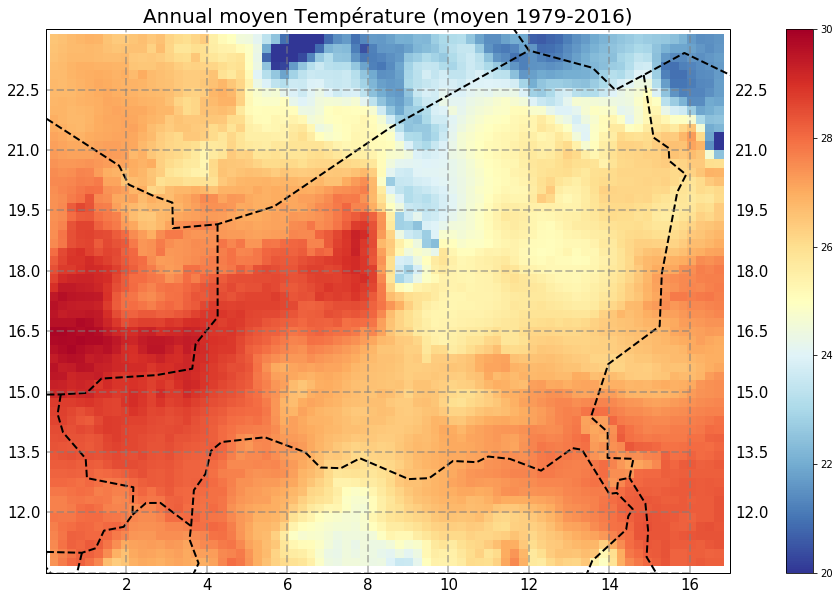

In [10]:
lons, lats = meshgrid(lon, lat)

fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())

extent=(-0,17,10.5,24)
ax.set_extent(extent)

ax.add_feature(cfeature.BORDERS, linewidth=2, linestyle='--')
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
# ax.gridlines(draw_labels=False)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylables_right = False
# gl.xlines = False
gl.xlocator = mticker.FixedLocator([0, 2,4,6,8,10,12,14,16] )
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('Annual moyen Température (moyen 1979-2016)', fontsize=20)

cs = plt.pcolormesh(lons, lats, tas_mean , transform=ccrs.PlateCarree(), cmap='RdYlBu_r', vmin=20, vmax=30 )
plt.colorbar(cs)
plt.savefig(fname='./pics/tas_mean_1979-2016.png')

In [97]:
# precipitation spatial plot for an example file

# available evaluation files:
pr_files = [ indic_path+f for f in listdir(indic_path) if 'prcptot_' in f and '_yr_' in f ]
for i in(pr_files):
    print(basename(i))

prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_19790101-20161231.nc
prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_GERICS-REMO2015_v1_yr_19790102-20171231.nc


In [98]:
# var = get_variable(nc)
#print 'variable name: %s' % var
ds1 = Dataset(pr_files[0])
ds2 = Dataset(pr_files[1])

var1 = ds1.variables['prcptot'] 
var2 = ds2.variables['prcptot'] 

lats = ds1.variables['lat']
lons = ds1.variables['lon']

# trick to recover missing lat lon information (only possible, since AFR-22 Domain is actrually not rotated)
lon = lons[0,:]
lat = lats[:,0]

var1_mean = np.nanmean(var1, axis=0) # * 84600 # mean over whole periode 30 Years 1981-2010 and transform to mm / day
var2_mean = np.nanmean(var2, axis=0) # * 84600
tas_mean = (var1_mean + var2_mean) / 2

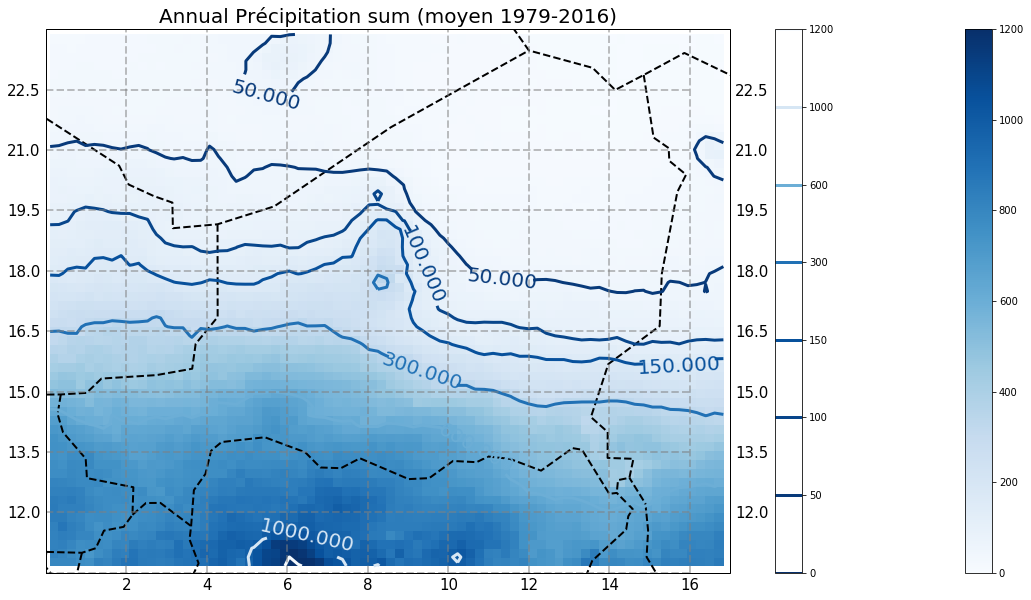

In [126]:
lons, lats = meshgrid(lon, lat)

fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())

extent=(-0,17,10.5,24)
ax.set_extent(extent)

ax.add_feature(cfeature.BORDERS, linewidth=2, linestyle='--')
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
# ax.gridlines(draw_labels=False)
# ax.set_xticks([0, 5, 10, 15], crs=ccrs.PlateCarree())
# ax.set_yticks([12, 14, 16, 18, 20, 22], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylables_right = False
# gl.xlines = False
gl.xlocator = mticker.FixedLocator([0, 2,4,6,8,10,12,14,16] )
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('Annual Précipitation sum (moyen 1979-2016)', fontsize=20)

cs = plt.pcolormesh(lons, lats, tas_mean , transform=ccrs.PlateCarree(), cmap='Blues', vmin=0, vmax=1200) 
# plt.hold()
plt.colorbar(cs)
cs2 = plt.contour(lons, lats, tas_mean , transform=ccrs.PlateCarree(), cmap='Blues_r',
                  levels =[0,50,100, 150, 300, 600, 1000, 1200], linewidths=3, vmin=0, vmax=1200 )

ax.clabel(cs2, inline=1, fontsize=20)
plt.colorbar(cs2)

plt.savefig(fname='./pics/pr_mean_1979-2016.png')

In [ ]:
from os import path, listdir

path = '/home/nils/nap_niger/data/bbox/'
# lists all files stored in 'path'
files = [ path+f for f in listdir(path) if 'tas_' in f]
files.sort()


from netCDF4 import Dataset #  , num2date
from eggshell.nc.nc_utils import get_variable
from numpy import meshgrid
import numpy as np 

# example file 
nc = files[5]

var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
var = ds.variables[var] 
lat = ds.variables['rlat']
lon = ds.variables['rlon']

lons, lats = meshgrid(lon, lat)

var_mean = np.mean(var[365:11315,:,:], axis=0) - 273.15 # mean over 30 Years 1981-2010 and transform to Celsius

# prepare the plot with cartopy

from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline
%matplotlib inline

fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())

extent=(-3,20,7,27)
ax.set_extent(extent)

ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('Temperature 2m mojen 1981-2010', fontsize=20)

cs = plt.pcolormesh(lons, lats, var_mean , transform=ccrs.PlateCarree(), cmap='RdYlBu_r', vmin=20, vmax=30)
plt.colorbar(cs)
plt.savefig(fname='./pics/prcptot_mean_1979-2016_bbox.png')

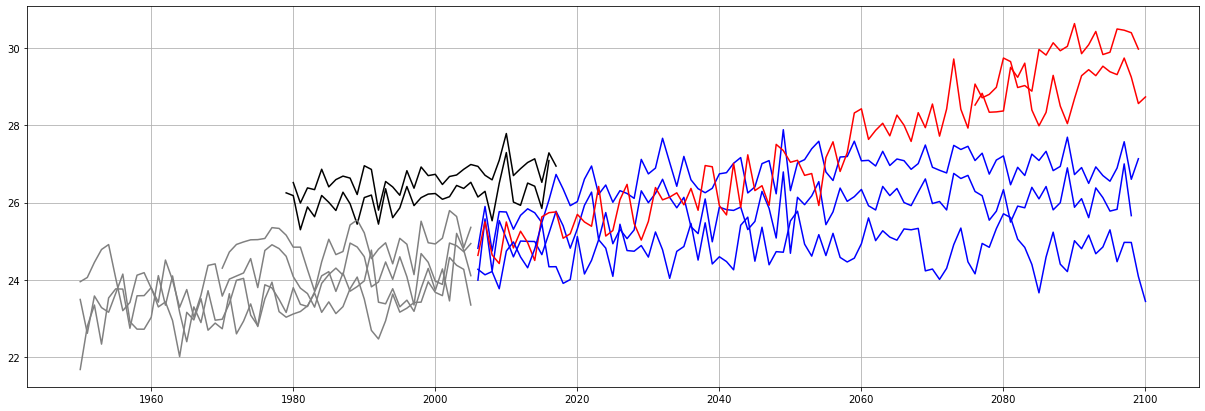

In [34]:
fig = plt.figure(figsize=(21, 7), facecolor='w', edgecolor='k')
   
for i in tg_files:
    ds = Dataset(i)
    var = get_variable(i)
    tg_val = ds.variables[var] 
    yrs = get_time(i)
    if 'historical' in i:
        col = 'grey'
    elif 'evaluation' in i:
        col = 'black'
    elif 'rcp26' in i:
        col = 'blue'
    elif 'rcp85' in i:
        col = 'red'
    else:
        col = 'green'
    
    d2 = np.nanmean(tg_val, axis=1)
    ts = np.nanmean(d2, axis=1) - 273.15
    plt.plot(yrs,ts, col )

plt.grid()    
plt.savefig(fname='./pics/tas_timeserie.png')    
plt.show() 